<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
            300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


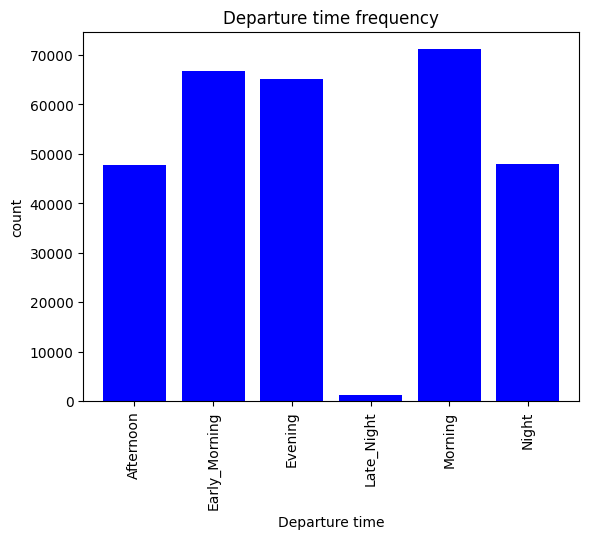

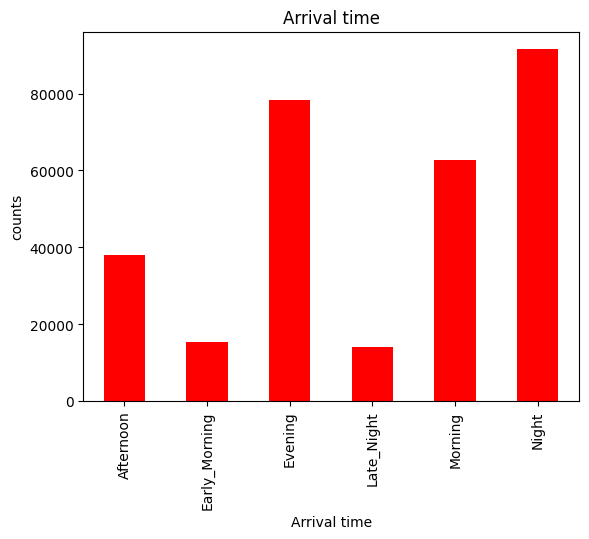

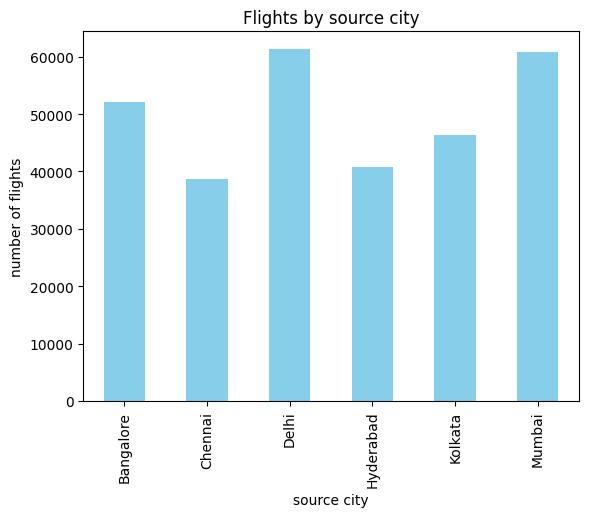

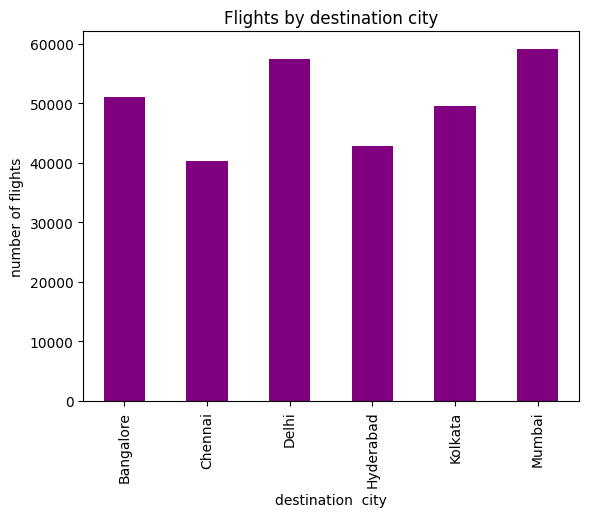

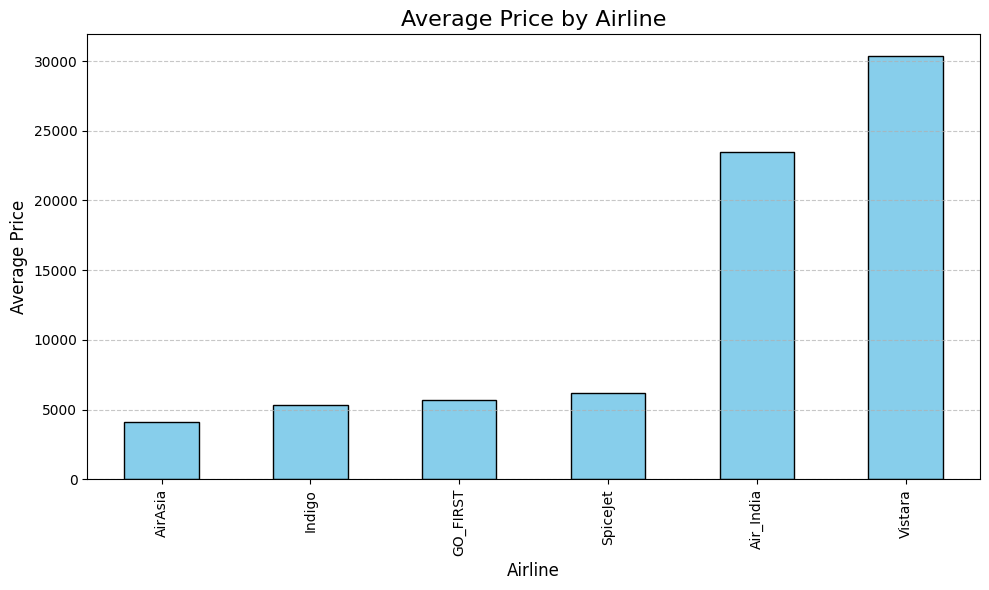

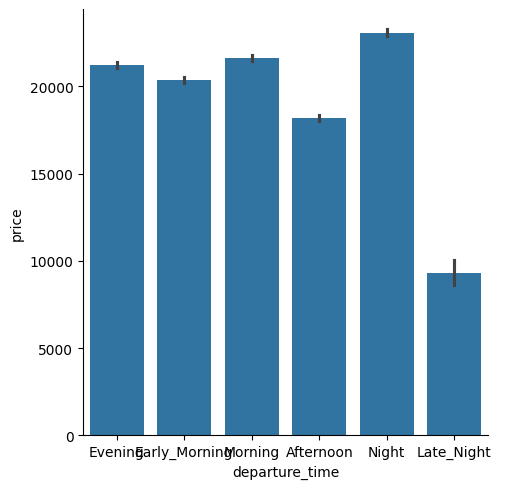

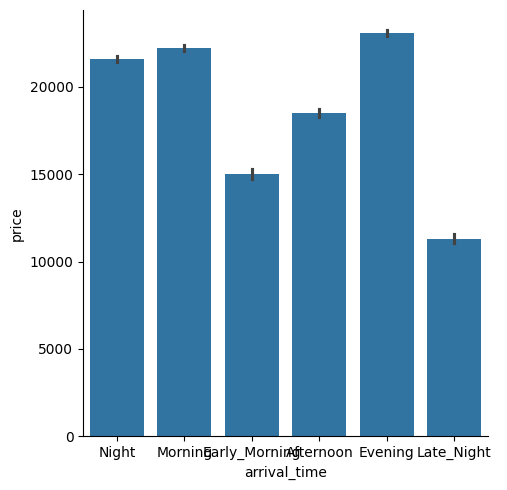

/var/folders/zd/l5rzxx4s1c783qx06hbtytgw0000gn/T/ipykernel_28549/1815712067.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source_city', y='price', data=df, palette='Set2')
/var/folders/zd/l5rzxx4s1c783qx06hbtytgw0000gn/T/ipykernel_28549/1815712067.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='destination_city', y='price', data=df, palette='Set3')


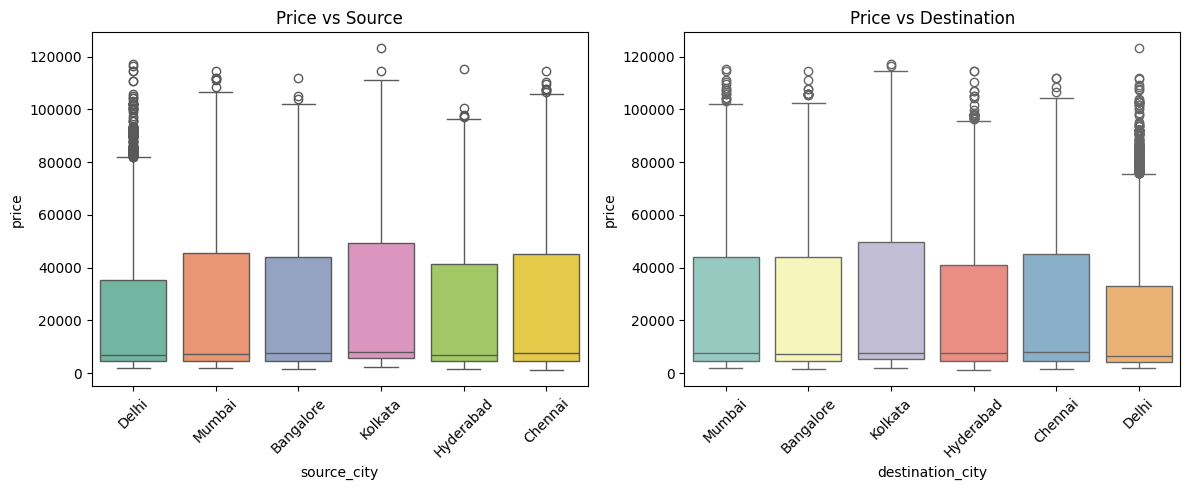

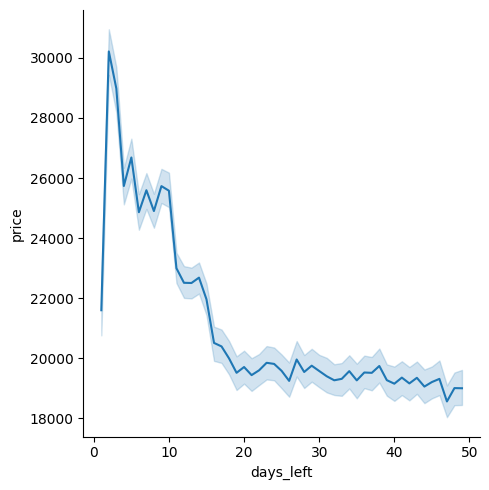

nan

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/Users/ranjeetsingh/Downloads/airlines_flights_data.csv",lineterminator="\n")
df.drop(columns='index',inplace=True) #dropping unused columns,index.
df.head()
df.info()
#to get statistical summary.
df.describe()
# to check for missing values.
df.isnull().sum()
#Q.1. What are the airlines in the dataset, accompanied by their frequencies?
df['airline'].value_counts()
df.columns=['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left','price'
] #to modify the features name.

#Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.
  #Departure time bar graph:
df['departure_time'].value_counts().sort_index().plot(kind='bar',color='blue',width=0.8)
plt.title("Departure time frequency")
plt.xlabel("Departure time")
plt.ylabel("count")
plt.show()
df.head()
#arrival time bar graph:
df['arrival_time'].value_counts().sort_index().plot(kind='bar',color='red')
plt.title("Arrival time")
plt.xlabel("Arrival time")
plt.ylabel("counts")
plt.show()
df.head()
#Q.3. Show Bar Graphs representing the Source City & Destination City.
df['source_city'].value_counts().sort_index().plot(kind='bar',color='skyblue')
plt.title('Flights by source city')
plt.xlabel('source city')
plt.ylabel('number of flights')
plt.show()
df['destination_city'].value_counts().sort_index().plot(kind='bar',color='purple')
plt.title('Flights by destination city')
plt.xlabel('destination  city')
plt.ylabel('number of flights')
plt.show()
#Q.4. Does price varies with airlines ?
# Group by airline and calculate the mean price
avg_price_per_airline = df.groupby('airline')['price'].mean().sort_values()
# Plot the bar chart
plt.figure(figsize=(10,6))
avg_price_per_airline.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Price by Airline", fontsize=16)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#Q.5. Does ticket price change based on the departure time and arrival time?
df.groupby('departure_time')['price'].mean()
df.groupby('arrival_time')['price'].mean()
sns.catplot(x='departure_time',y='price',kind='bar',data=df,width=0.8)
plt.show()
sns.catplot(x='arrival_time',y='price',kind='bar',data=df)
plt.show()
#Q.6. How the price changes with change in Source and Destination?
plt.figure(figsize=(12,5))

# Price vs Source
plt.subplot(1, 2, 1)
sns.boxplot(x='source_city', y='price', data=df, palette='Set2')
plt.title('Price vs Source')
plt.xticks(rotation=45)

# Price vs Destination
plt.subplot(1, 2, 2)
sns.boxplot(x='destination_city', y='price', data=df, palette='Set3')
plt.title('Price vs Destination')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
df.head()
#Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?

df.groupby('days_left')['price'].mean()
sns.relplot( y='price', x = 'days_left', kind = 'line', data = df )
plt.show()
#Q.8. How does the ticket price vary between Economy and Business class?
# Filtering out the records with Economy class
x = df[ df['class'] == 'Economy' ]
x
y= df[ df['class'] == 'business' ]
x.price.mean()
y.price.mean()
